<ipython-input-1-b2a59b0f92b8>:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection='3d')


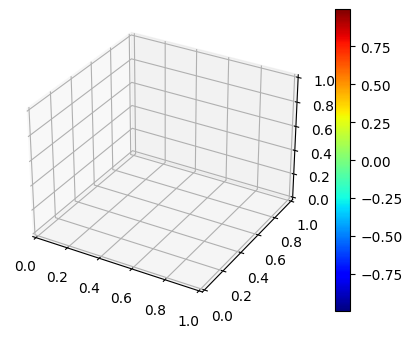

In [1]:
#by Mic on his blog website: beginner coding
#3D wave equation


import numpy as np
from numpy import pi,sin,cos,sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.gca(projection='3d')

x = np.linspace(0,1,30)
y = np.linspace(0,1,30)

X,Y = np.meshgrid(x,y)

#Wave speed
c = 1

#Initial time
t0 = 0

#Time increment
dt = 0.03

#Try every combination
p = 2 #1 #5 #2 #5
q = 3 #1 #5 #3 #3

w = pi*c*sqrt(p**2+q**2)

#Wave
def u(x,y,t):
    return (cos(w*t)+sin(w*t))*sin(pi*p*x)*sin(q*pi*y)

#Building the datapoints
a = []
for i in range(500):
    z = u(X,Y,t0)
    t0 = t0 + dt
    a.append(z)

#Adding the colorbar 
m = plt.cm.ScalarMappable(cmap=plt.cm.jet)
m.set_array(a[0])
cbar = plt.colorbar(m)

k = 0
def animate(i):
    global k
    Z = a[k]
    k += 1
    ax1.clear()
    ax1.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
    #ax1.contour(X,Y,Z)
    ax1.set_zlim(0,5)
    
anim = animation.FuncAnimation(fig,animate,frames=220,interval=20)
plt.show()


K =  0.9556363636363635


<IPython.core.display.Javascript object>


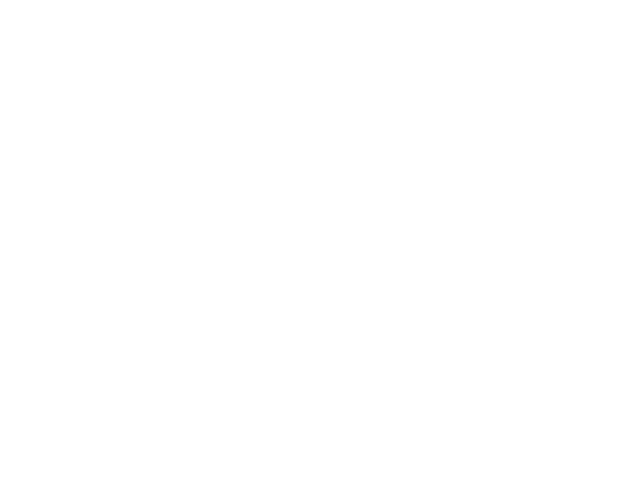

In [2]:
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from matplotlib import cm

# Solves 1D heat conduction equation with Crank-Nicolson algorithm

# Constants (MKS units)
alpha = 1.0e-6   # thermal diffusivity of alumninum
Lx = 30        # length of aluminum rod
Nx = 100         # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = 3*31536000       # total time (years) and converting to seconds
#tot_time = 10*31536000
Nt = 1100        # number of time steps
dt = tot_time/Nt # time-step
K  = alpha*dt/(dx*dx)
print('K = ', K)

# Create arrays
x = np.linspace(0,Lx,Nx+1)
t = np.linspace(0,tot_time,Nt+1)
T = np.zeros([Nx+1,Nt+1])





# Initial conditions & boundary conditions
# Comment out the initial conditions you don't want

# Case 1:
# Bar with different temperatures on ends
# Step-function with half bar hot, half-bar cold
#Tlo = 0.0        # low temperature in Celsius
#Thi = 100.0      # high temperature in Celsius
#T[0:50,0] = Thi; T[50:Nx,0]= Tlo # step-function

# Case 2:
# Ends of bar fixed at same temperature T=0
# Initial temperature profile is Gaussian
#T[:,0]=100*np.exp(-1.0e6*(x-Lx/2.0)**2) # Gaussian

# Case 3:
# Ends of bar fixed at same temperature T=50
# Initial temperature profile is sine function
#T[:,0]=50+50*np.sin(4*2.0*np.pi*x/Lx) # sin


#T[:,0] = np.zeros(len(x))

sec2year = 31536000

w1 = 2*np.pi/sec2year

T[0,:] = 30*np.sin(w1*t) 

# - - - - - - - - - - - - - - - - - - - - - - #

# Integrate in time with Crank-Nicolson method
M1 = np.zeros([Nx+1,Nx+1])
M1[0,0]=1
M1[Nx,Nx]=1
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1])
M2[0,0]=1
M2[Nx,Nx]=1
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    Tq = T[:,j]
    Tq[0] = 30*np.sin( ((w1)*t[j]  ))
    T[:,j+1]=np.matmul(MM,Tq)
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(-50, 50))
ax.plot(x,T[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('temperature (deg Celsius)')
plt.grid()

line, = ax.plot([], [], lw=3)
time_template = 'time = %.3f yr'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x,T[:,i])
    time_text.set_text(time_template % (t[i]/31536000))
    return line, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

#ani.save('thermalDepthEarth.gif',writer='imagemagick',fps=30)

plt.show()


<IPython.core.display.Javascript object>


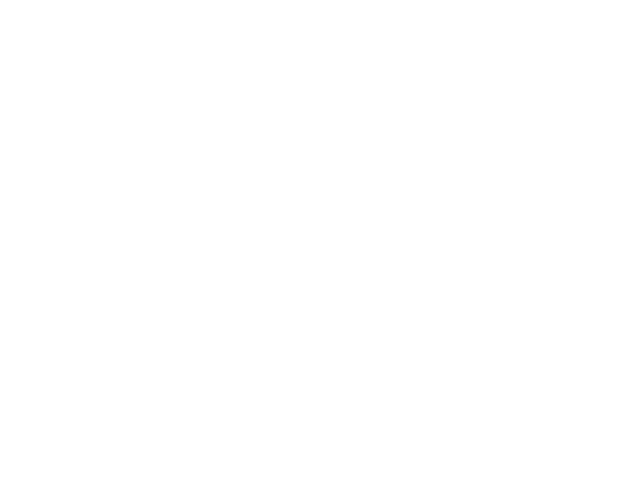

In [3]:
sec2year = 31536000
X,Y = np.meshgrid(x,t)
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(X,Y/sec2year,np.transpose(T),cmap = cm.summer,antialiased=True)
fig.colorbar(surf,shrink=0.5,aspect=10,location='right',pad=0.075)
ax.set_xlim(0,30)
ax.set_xlabel('Depth (m)')
ax.set_zlabel('Temperature (deg Celsius)')
ax.set_ylabel('Time (yr)')
fig.tight_layout()

#fig.savefig('EarthTempDepth.pdf',bbox_inches='tight')


plt.show()

In [4]:
np.where(x==9.9)

(array([33]),)

<IPython.core.display.Javascript object>


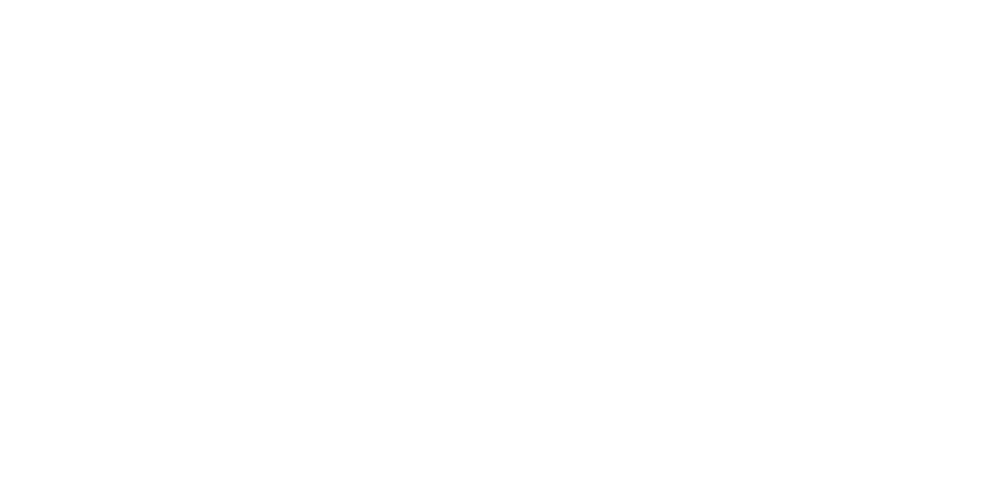

In [5]:
fig3 = plt.figure(figsize=(10,5))
plt.plot(t,T[0,:],label='surface temp')
plt.plot(t,T[33,:],label='shifted temp')
plt.xlabel('depth (m)')
plt.ylabel('Temperature (degree Celsius)')
plt.grid()
plt.show()

#fig3.savefig('lagphase.pdf',bbox_inches='tight')





K =  1.25


<IPython.core.display.Javascript object>


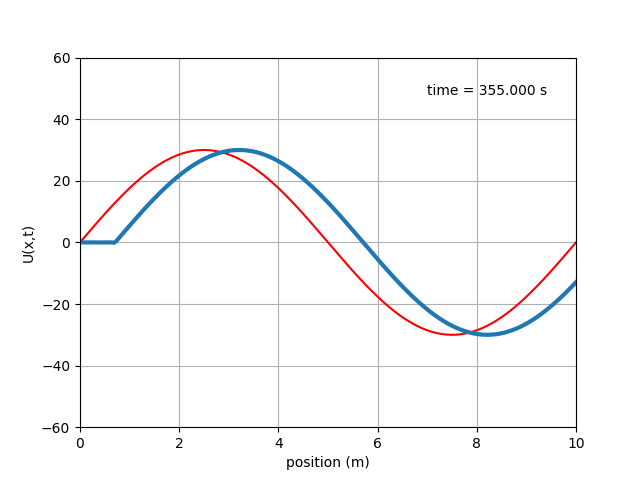

In [6]:
#problem 2 advection equation
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

alpha = 1.0e-6   # thermal diffusivity of alumninum
Lx = 10       # length of aluminum rod
Nx = 5000         # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = 5000       # total time (years) and converting to seconds
Nt = 1000        # number of time steps
dt = tot_time/Nt # time-step
K  = alpha*dt/(dx*dx)
print('K = ', K)

# Create arrays
x = np.linspace(0,Lx,Nx+1)
t = np.linspace(0,tot_time,Nt+1)
T = np.zeros([Nx+1,Nt+1])





# Initial conditions & boundary conditions
# Comment out the initial conditions you don't want

# Case 1:
# Bar with different temperatures on ends
# Step-function with half bar hot, half-bar cold
#Tlo = 0.0        # low temperature in Celsius
#Thi = 100.0      # high temperature in Celsius
#T[0:50,0] = Thi; T[50:Nx,0]= Tlo # step-function

# Case 2:
# Ends of bar fixed at same temperature T=0
# Initial temperature profile is Gaussian
#T[:,0]=100*np.exp(-1.0e6*(x-Lx/2.0)**2) # Gaussian

# Case 3:
# Ends of bar fixed at same temperature T=50
# Initial temperature profile is sine function
T[:,0]=30*np.sin(2.0*np.pi*x/Lx) # sin


#T[:,0] = np.zeros(len(x))

#sec2year = 31536000

#w1 = 2*np.pi/sec2year

#T[0,:] = 30*np.sin(w1*t) 

# - - - - - - - - - - - - - - - - - - - - - - #

# Integrate in time with Crank-Nicolson method
M1 = np.zeros([Nx+1,Nx+1])
M1[0,0]=1
M1[Nx,Nx-2]= K
M1[Nx,Nx-1] = -4*K
M1[Nx,Nx] = 1+3*K
for i in range(1,Nx):
    M1[i,i-1]= -K
    M1[i,i  ]=1.0
    M1[i,i+1]= K
M2 = np.zeros([Nx+1,Nx+1])
M2[0,0]=1
M2[Nx,Nx-2] = -K
M2[Nx,Nx-1] = 4*K
M2[Nx,Nx]= 1 - 3*K

for i in range(1,Nx):
    M2[i,i-1]= K
    M2[i,i  ]= 1.0
    M2[i,i+1]= -K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    T[0,j] = 0.0
    T[:,j+1]=np.matmul(MM,T[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(-60, 60))
ax.plot(x,T[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('U(x,t)')
plt.grid()

line, = ax.plot([], [], lw=3)
time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x,T[:,i])
    time_text.set_text(time_template % (t[i]))
    return line, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)

#ani.save('transparantAdvecntion.gif',writer='imagemagick',fps=5)

plt.show()


In [7]:
#fig2,axes = plt.subplots(2,3,figsize=(10,6) )#,sharex = True,sharey = True)


#axes[0,0].plot([:,0],[:,1],'or')
#axes[0,0].set_title('t = 0 ps')
    
#axes[0,1].plot([:,0],[:,100],'or')
#axes[0,1].set_title('t = ' + "{:.3f}".format(t[100])+' ps')
    
#axes[0,2].plot([:,00],[:,100],'or')
#axes[0,2].set_title('t = '  + "{:.3f}".format(t[300])+' ps')

#axes[1,0].plot([:,000],[:,100],'or')
#axes[1,0].set_title('t = ' + "{:.3f}".format(t[500])+' ps')
    
    
#axes[1,1].plot([:,000],[:,100],'or')
#axes[1,1].set_title('t = '+ "{:.3f}".format(t[800])+' ps')
    
    
#axes[1,2].plot([:,050],[:,150],'or')
#axes[1,2].set_title('t = '+ "{:.3f}".format(t[850])+' ps')
#fig2.tight_layout()

SyntaxError: invalid syntax (<ipython-input-7-7756d927149b>, line 4)

<IPython.core.display.Javascript object>


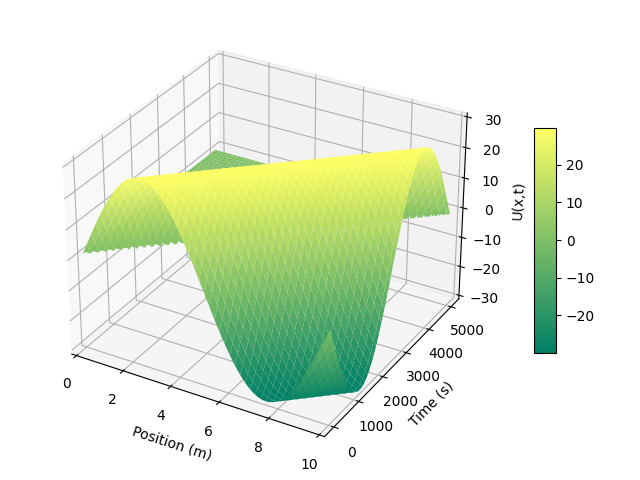

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [8]:
X,Y = np.meshgrid(x,t)
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(X,Y,np.transpose(T),cmap = cm.summer,antialiased=True)
fig.colorbar(surf,shrink=0.5,aspect=10,location='right',pad=0.075)
ax.set_xlim(0,10)
ax.set_xlabel('Position (m)')
ax.set_zlabel('U(x,t)')
ax.set_ylabel('Time (s)')
fig.tight_layout()

#fig.savefig('transparentBC_advection.pdf',bbox_inches='tight')

In [ ]:
alpha = 1.0e-6   # thermal diffusivity of alumninum
Lx = 10       # length of aluminum rod
Nx = 5000         # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = 4000       # 
Nt = 1000        # number of time steps
dt = tot_time/Nt # time-step
K  = alpha*dt/(dx*dx)
print('K = ', K)

K =  1.0


<IPython.core.display.Javascript object>


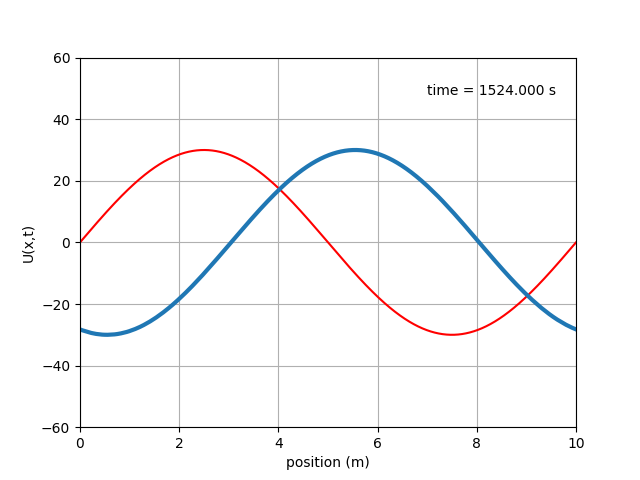

In [9]:
#problem 2 advection equation : periodic boundaries
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

alpha = 1.0e-6   # thermal diffusivity of alumninum
Lx = 10       # length of aluminum rod
Nx = 5000         # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = 4000       # total time (years) and converting to seconds
Nt = 1000        # number of time steps
dt = tot_time/Nt # time-step
K  = alpha*dt/(dx*dx)
print('K = ', K)

# Create arrays
x = np.linspace(0,Lx,Nx+1)
t = np.linspace(0,tot_time,Nt+1)
T = np.zeros([Nx+1,Nt+1])





# Initial conditions & boundary conditions
# Comment out the initial conditions you don't want

# Case 1:
# Bar with different temperatures on ends
# Step-function with half bar hot, half-bar cold
#Tlo = 0.0        # low temperature in Celsius
#Thi = 100.0      # high temperature in Celsius
#T[0:50,0] = Thi; T[50:Nx,0]= Tlo # step-function

# Case 2:
# Ends of bar fixed at same temperature T=0
# Initial temperature profile is Gaussian
#T[:,0]=100*np.exp(-1.0e6*(x-Lx/2.0)**2) # Gaussian

# Case 3:
# Ends of bar fixed at same temperature T=50
# Initial temperature profile is sine function
T[:,0]=30*np.sin(2.0*np.pi*x/Lx) # sin


#T[:,0] = np.zeros(len(x))

#sec2year = 31536000

#w1 = 2*np.pi/sec2year

#T[0,:] = 30*np.sin(w1*t) 

# - - - - - - - - - - - - - - - - - - - - - - #

# Integrate in time with Crank-Nicolson method
M1 = np.zeros([Nx+1,Nx+1])
M1[0,0]=1
M1[0,1] = K
M1[0,Nx] = -K
M1[Nx,0] = K
M1[Nx,Nx-1] = -K
M1[Nx,Nx]= 1.0
for i in range(1,Nx):
    M1[i,i-1]= -K
    M1[i,i  ]=1.0
    M1[i,i+1]= K
M2 = np.zeros([Nx+1,Nx+1])
M2[0,0]=1
M2[0,1] = -K
M2[0,Nx] = K

M2[Nx,0] = -K
M2[Nx,Nx-1] = K
M2[Nx,Nx]= 1.0
for i in range(1,Nx):
    M2[i,i-1]= K
    M2[i,i  ]= 1.0
    M2[i,i+1]= -K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    T[:,j+1]=np.matmul(MM,T[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(-60, 60))
ax.plot(x,T[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('U(x,t)')
plt.grid()

line, = ax.plot([], [], lw=3)
time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x,T[:,i])
    time_text.set_text(time_template % (t[i]))
    return line, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)
#ani.save('periodAdvection.gif',writer='imagemagick',fps=5)


plt.show()


<IPython.core.display.Javascript object>


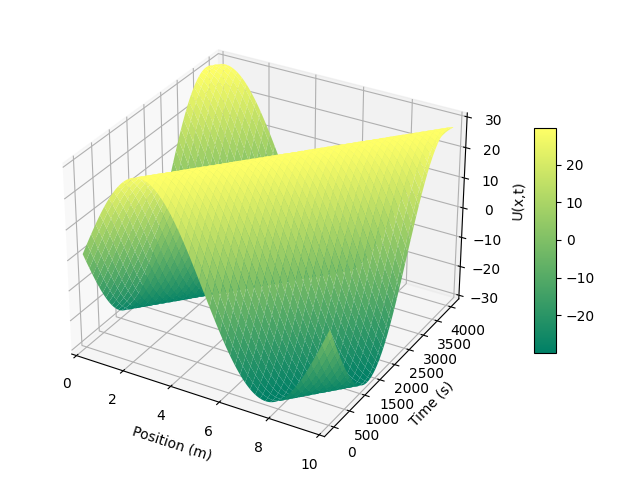

In [10]:
X,Y = np.meshgrid(x,t)
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(X,Y,np.transpose(T),cmap = cm.summer,antialiased=True)
fig.colorbar(surf,shrink=0.5,aspect=10,location='right',pad=0.075)
ax.set_xlim(0,10)
ax.set_xlabel('Position (m)')
ax.set_zlabel('U(x,t)')
ax.set_ylabel('Time (s)')
fig.tight_layout()

#fig.savefig('periodBC_advection.pdf',bbox_inches='tight')

K =  11.71875j


<IPython.core.display.Javascript object>


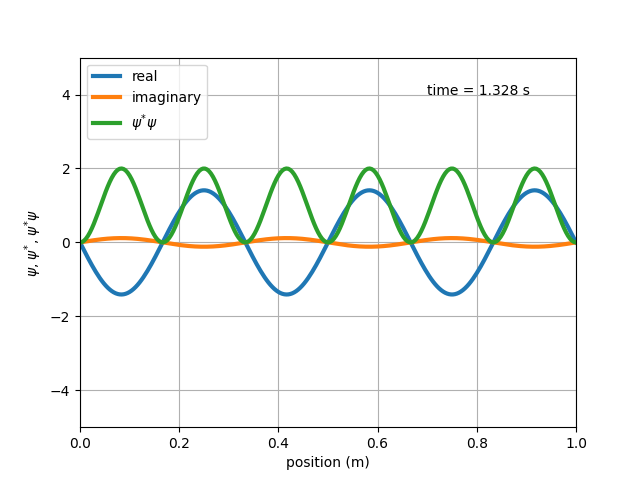

<IPython.core.display.Javascript object>


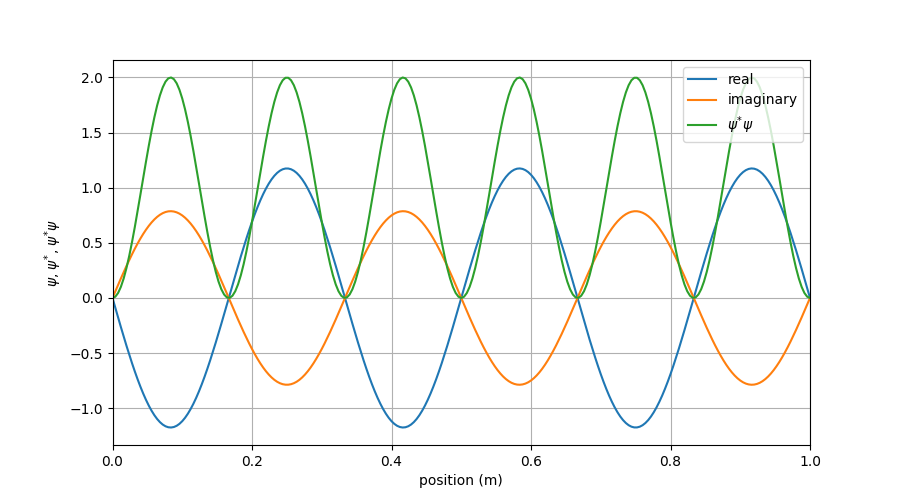

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [11]:
#problem 3 !!!!!!!!! QUANTUM MECHANICS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = 3      
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

# Create arrays
x = np.linspace(0,Lx,Nx+1)
t = np.linspace(0,tot_time,Nt+1)

psi = np.zeros([Nx+1,Nt+1]).astype(complex)
psi[:,0] = np.sin(3*2.0*np.pi*x/Lx)
A = np.trapz(psi[:,0]*np.conjugate(psi[:,0]),dx=dx)
psi[:,0] = psi[:,0]/np.sqrt(A)




M1 = np.zeros([Nx+1,Nx+1]).astype(complex)
M1[0,0]=1
M1[Nx,Nx]=1
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1]).astype(complex)
M2[0,0]=1
M2[Nx,Nx]=1
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    psi[:,j+1]=np.matmul(MM,psi[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(-5, 5))
#ax.plot(x,psi[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
ax.grid()

line1, = ax.plot([], [], lw=3,label='real')
line2, = ax.plot([], [], lw=3,label='imaginary')
line3, = ax.plot([], [], lw=3,label='$\psi^{*}\psi$')
ax.legend(loc='upper left')

time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line1.set_data(x,np.real(psi[:,i]))
    line2.set_data(x,np.imag(psi[:,i]))
    line3.set_data(x,psi[:,i]*np.conjugate(psi[:,i]))
    time_text.set_text(time_template % (t[i]))
    return line1,line2,line3, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)

#ani.save('wavefunctions.gif',writer='imagemagick',fps=10)


fig2 = plt.figure(figsize=(9,5))


plt.plot(x,np.real(psi[:,1000]),label='real')
plt.plot(x,np.imag(psi[:,1000]),label='imaginary')
plt.plot(x,np.conjugate(psi[:,1000])*psi[:,1000],label='$\psi^{*}\psi$')
plt.xlim(0,1)
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
plt.legend()
plt.grid()
plt.show()
#fig2.savefig('wavefunctions.pdf',bbox_inches='tight')


In [ ]:


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = .16      
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

x = np.linspace(-Lx/2,Lx/2,Nx+1)
t = np.linspace(0,tot_time,Nt+1)



In [ ]:
np.where(t==0.08) #shows what indexx is at t = 0.08

K =  0.6250000000000001j


<IPython.core.display.Javascript object>


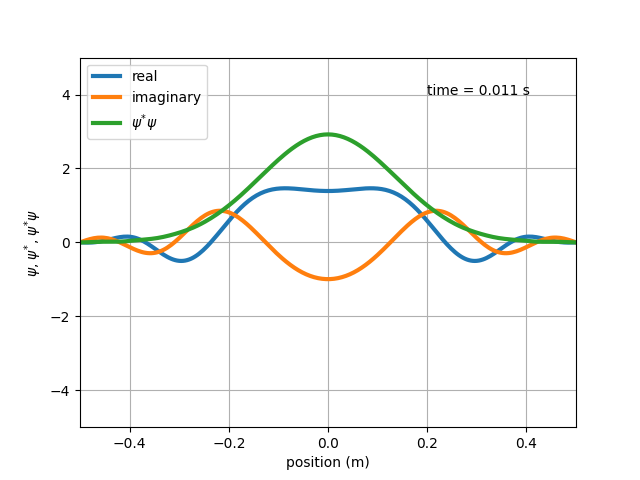

In [13]:
 #problem 3b !!!!!!!!! QUANTUM MECHANICS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = .16      
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

# Create arrays
x = np.linspace(-Lx/2,Lx/2,Nx+1)
t = np.linspace(0,tot_time,Nt+1)

psi = np.zeros([Nx+1,Nt+1]).astype(complex)
psi[:,0] = np.exp(-128*(x**2))
A = np.trapz(psi[:,0]*np.conjugate(psi[:,0]),dx=dx)
psi[:,0] = psi[:,0]/np.sqrt(A)



M1 = np.zeros([Nx+1,Nx+1]).astype(complex)
M1[0,0]=1
M1[Nx,Nx]=1
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1]).astype(complex)
M2[0,0]=1
M2[Nx,Nx]=1
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    psi[:,j+1]=np.matmul(MM,psi[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2, Lx/2), ylim=(-5, 5))
#ax.plot(x,psi[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
ax.grid()

line1, = ax.plot([], [], lw=3,label='real')
line2, = ax.plot([], [], lw=3,label='imaginary')
line3, = ax.plot([], [], lw=3,label='$\psi^{*}\psi$')
ax.legend(loc='upper left')

time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line1.set_data(x,np.real(psi[:,i]))
    line2.set_data(x,np.imag(psi[:,i]))
    line3.set_data(x,psi[:,i]*np.conjugate(psi[:,i]))
    time_text.set_text(time_template % (t[i]))
    return line1,line2,line3, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)

#ani.save('Gausswavefunctions.gif',writer='imagemagick',fps=5)



#plt.show()

In [ ]:
#3b
fig2,ax = plt.subplots(nrows = 5, ncols=1,figsize=(10,18))
plt.subplots_adjust(hspace=0.25)

j = 0 
for i in range(5):
    for k in range(1):
        ax[i].plot(x,np.real(psi[:,j]),label='real')
        ax[i].plot(x,np.imag(psi[:,j]),label='imaginary')
        ax[i].plot(x,np.real(psi[:,j])*np.conjugate(psi[:,j]),label='$\psi^{*}\psi$')
        ax[i].legend(loc='upper right')
        ax[i].grid()
        ax[i].text(0.0, 0.85,'time = %.2f' % t[j],transform=ax[i].transAxes)
        ax[i].set_xlabel('position')
        

        
        j+= 2000



#fig2.savefig('Gausswavefunctions.pdf',bbox_inches='tight')
plt.show()

In [ ]:
 #problem 3c !!!!!!!!! QUANTUM MECHANICS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
#tot_time = 3   #3 is more animation
tot_time = .16 #.16 is for plots
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

# Create arrays
x = np.linspace(-Lx/2,Lx/2,Nx+1)
t = np.linspace(0,tot_time,Nt+1)

psi = np.zeros([Nx+1,Nt+1]).astype(complex)
psi[:,0] = np.exp(-128*(x**2))
A = np.trapz(psi[:,0]*np.conjugate(psi[:,0]),dx=dx)
psi[:,0] = psi[:,0]/np.sqrt(A)



M1 = np.zeros([Nx+1,Nx+1]).astype(complex)
V = np.zeros(Nx+1).astype(complex)

x1 = 100
x2 = 150

M1[0,0]=1 + 1j*V[0]
M1[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K +1j*V[i]
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1]).astype(complex)
M2[0,0]=1 + 1j*V[0]
M2[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K + 1j*V[i]
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    psi[:,j+1]=np.matmul(MM,psi[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2, Lx/2), ylim=(-5, 5))
#ax.plot(x,psi[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
ax.grid()

ax.axvline(x=x[x1],color='k',ls='--')
ax.axvline(x=x[x2],color='k',ls='--')
line1, = ax.plot([], [], lw=3,label='real')
line2, = ax.plot([], [], lw=3,label='imaginary')
line3, = ax.plot([], [], lw=3,label='$\psi^{*}\psi$')
ax.legend(loc='upper left')

time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line1.set_data(x,np.real(psi[:,i]))
    line2.set_data(x,np.imag(psi[:,i]))
    line3.set_data(x,psi[:,i]*np.conjugate(psi[:,i]))
    time_text.set_text(time_template % (t[i]))
    return line1,line2,line3, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),5),
                              interval=8, blit=True, init_func=init)

#ani.save('GausswavefunctionwithPotential.gif',writer='imagemagick',fps=5)

fig2,ax = plt.subplots(nrows = 5, ncols=1,figsize=(10,18))
plt.subplots_adjust(hspace=0.25)

j = 0 
for i in range(5):
    for k in range(1):
        ax[i].axvline(x=x[x1],color='k',ls='--')
        ax[i].axvline(x=x[x2],color='k',ls='--')
        ax[i].plot(x,np.real(psi[:,j]),label='real')
        ax[i].plot(x,np.imag(psi[:,j]),label='imaginary')
        ax[i].plot(x,np.real(psi[:,j])*np.conjugate(psi[:,j]),label='$\psi^{*}\psi$')
        ax[i].legend(loc='upper right')
        ax[i].grid()
        ax[i].text(0.0, 0.85,'time = %.2f' % t[j],transform=ax[i].transAxes)
        ax[i].set_xlabel('position')
        
        
        j+= 2000



#fig2.savefig('GausswavefunctionsWithPotential.pdf',bbox_inches='tight')
plt.show()



In [ ]:
 #problem 3c !!!!!!!!! QUANTUM MECHANICS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #obstacle not at the center 
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
#tot_time = 3   #3 is more animation
tot_time = .16 #.16 is for plots
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

# Create arrays
x = np.linspace(-Lx/2,Lx/2,Nx+1)
t = np.linspace(0,tot_time,Nt+1)

psi = np.zeros([Nx+1,Nt+1]).astype(complex)
psi[:,0] = np.exp(-128*(x**2))
A = np.trapz(psi[:,0]*np.conjugate(psi[:,0]),dx=dx)
psi[:,0] = psi[:,0]/np.sqrt(A)



M1 = np.zeros([Nx+1,Nx+1]).astype(complex)
V = np.zeros(Nx+1).astype(complex)

x1 = 40
x2 = 60
V[50:75] = np.linspace(10,10,25)
M1[0,0]=1 + 1j*V[0]
M1[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K +1j*V[i]
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1]).astype(complex)
M2[0,0]=1 + 1j*V[0]
M2[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K + 1j*V[i]
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    psi[:,j+1]=np.matmul(MM,psi[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2, Lx/2), ylim=(-5, 5))
#ax.plot(x,psi[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
ax.grid()

ax.axvline(x=x[x1],color='k',ls='--')
ax.axvline(x=x[x2],color='k',ls='--')
line1, = ax.plot([], [], lw=3,label='real')
line2, = ax.plot([], [], lw=3,label='imaginary')
line3, = ax.plot([], [], lw=3,label='$\psi^{*}\psi$')
ax.legend(loc='upper left')

time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line1.set_data(x,np.real(psi[:,i]))
    line2.set_data(x,np.imag(psi[:,i]))
    line3.set_data(x,psi[:,i]*np.conjugate(psi[:,i]))
    time_text.set_text(time_template % (t[i]))
    return line1,line2,line3, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)

#ani.save('GausswavefunctionwithsidewayPotential.gif',writer='imagemagick',fps=5)






In [ ]:
 #problem 3c !!!!!!!!! QUANTUM MECHANICS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #obstacle not at the center 
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation


alpha = 0.5j   # thermal diffusivity of alumninum
Lx = 1       # length of aluminum rod
Nx = 250        # number of grid cells
dx = Lx/Nx       # grid cell size
tot_time = .16   #3 is more animation
#tot_time = .16 #.16 is for plots
Nt = 8000      # number of time steps
dt = tot_time/Nt # time-step
K  = complex(alpha*dt/(dx*dx))
print('K = ', K)

# Create arrays
x = np.linspace(-Lx/2,Lx/2,Nx+1)
t = np.linspace(0,tot_time,Nt+1)

psi = np.zeros([Nx+1,Nt+1]).astype(complex)
psi[:,0] = np.exp(-128*(x**2))
A = np.trapz(psi[:,0]*np.conjugate(psi[:,0]),dx=dx)
psi[:,0] = psi[:,0]/np.sqrt(A)



M1 = np.zeros([Nx+1,Nx+1]).astype(complex)
V = np.zeros(Nx+1).astype(complex)

x1 = 100
x2 = 150
V[100:150] = np.linspace(10,50)
M1[0,0]=1 + 1j*V[0]
M1[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K +1j*V[i]
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nx+1,Nx+1]).astype(complex)
M2[0,0]=1 + 1j*V[0]
M2[Nx,Nx]=1 + 1j*V[Nx]
for i in range(1,Nx):
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K + 1j*V[i]
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2)

for j in range(0,Nt):
    psi[:,j+1]=np.matmul(MM,psi[:,j])
    

# - - - - - - - - - - - - - - - - #

# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(-Lx/2, Lx/2), ylim=(-5, 5))
#ax.plot(x,psi[:,0],'-r')
plt.xlabel('position (m)')
plt.ylabel('$\psi$, $\psi^{*}$, $\psi^{*}\psi$')
ax.grid()

ax.axvline(x=x[x1],color='k',ls='--')
ax.axvline(x=x[x2],color='k',ls='--')
line1, = ax.plot([], [], lw=3,label='real')
line2, = ax.plot([], [], lw=3,label='imaginary')
line3, = ax.plot([], [], lw=3,label='$\psi^{*}\psi$')
ax.legend(loc='upper left')

time_template = 'time = %.3f s'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line1.set_data(x,np.real(psi[:,i]))
    line2.set_data(x,np.imag(psi[:,i]))
    line3.set_data(x,psi[:,i]*np.conjugate(psi[:,i]))
    time_text.set_text(time_template % (t[i]))
    return line1,line2,line3, time_text


ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t),10),
                              interval=8, blit=True, init_func=init)

#ani.save('GausswavefunctionwithcenralPotential.gif',writer='imagemagick',fps=5)

fig2,ax = plt.subplots(nrows = 5, ncols=1,figsize=(10,18))
plt.subplots_adjust(hspace=0.25)

j = 0 
for i in range(5):
    for k in range(1):
        ax[i].axvline(x=x[x1],color='k',ls='--')
        ax[i].axvline(x=x[x2],color='k',ls='--')
        ax[i].plot(x,np.real(psi[:,j]),label='real')
        ax[i].plot(x,np.imag(psi[:,j]),label='imaginary')
        ax[i].plot(x,np.real(psi[:,j])*np.conjugate(psi[:,j]),label='$\psi^{*}\psi$')
        ax[i].legend(loc='upper right')
        ax[i].grid()
        ax[i].text(0.0, 0.85,'time = %.2f' % t[j],transform=ax[i].transAxes)
        ax[i].set_xlabel('position')
        
        
        j+= 2000



#fig2.savefig('GausswavefunctionsWithcentralPotential.pdf',bbox_inches='tight')
plt.show()





In [ ]:
#problem 4 QUANTUM MECHANICS !!!!!!
